In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import utils
from keras.layers.convolutional import Conv2D
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [0]:
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
numclass = 10
train_labels = keras.utils.to_categorical(train_labels, numclass)
test_labels = keras.utils.to_categorical(test_labels, numclass)

Underfit Model

In [0]:
# set up the layers

model = models.Sequential()
model.add(layers.Conv2D(8, kernel_size=(20, 20), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Dropout(0.75))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

# compile the model

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 14s 277us/step - loss: 0.3076 - acc: 0.8998 - val_loss: 0.2880 - val_acc: 0.9003
Epoch 2/20
50000/50000 [==============================] - 11s 218us/step - loss: 0.2878 - acc: 0.8999 - val_loss: 0.2758 - val_acc: 0.9008
Epoch 3/20
50000/50000 [==============================] - 11s 219us/step - loss: 0.2790 - acc: 0.9004 - val_loss: 0.2665 - val_acc: 0.9019
Epoch 4/20
50000/50000 [==============================] - 11s 220us/step - loss: 0.2739 - acc: 0.9008 - val_loss: 0.2737 - val_acc: 0.9016
Epoch 5/20
50000/50000 [==============================] - 11s 221us/step - loss: 0.2701 - acc: 0.9014 - val_loss: 0.2687 - val_acc: 0.9017
Epoch 6/20
50000/50000 [==============================] - 11s 225us/step - loss: 0.2671 - acc: 0.9019 - val_loss: 0.2633 - val_acc: 0.9023
Epoch 7/20
50000/50000 [==============================] - 11s 221us/step - loss: 0.2649 - acc: 0.9022 - val_loss: 0.

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 106us/step
Test accuracy: 0.9061399755477906


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

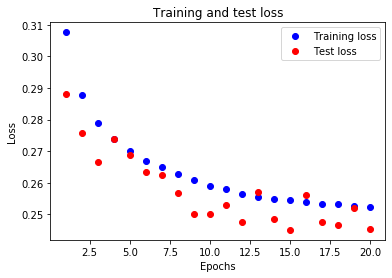

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

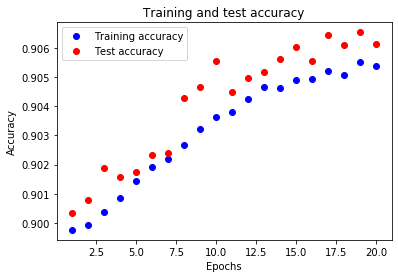

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Overfit Model

In [0]:
# set up the layers

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(layers.Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# compile the model

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 23s 460us/step - loss: 0.2643 - acc: 0.9038 - val_loss: 0.2389 - val_acc: 0.9078
Epoch 2/20
50000/50000 [==============================] - 20s 401us/step - loss: 0.2269 - acc: 0.9125 - val_loss: 0.2234 - val_acc: 0.9153
Epoch 3/20
50000/50000 [==============================] - 20s 400us/step - loss: 0.2102 - acc: 0.9186 - val_loss: 0.2070 - val_acc: 0.9204
Epoch 4/20
50000/50000 [==============================] - 20s 402us/step - loss: 0.1970 - acc: 0.9236 - val_loss: 0.1947 - val_acc: 0.9240
Epoch 5/20
50000/50000 [==============================] - 20s 398us/step - loss: 0.1868 - acc: 0.9277 - val_loss: 0.2012 - val_acc: 0.9230
Epoch 6/20
50000/50000 [==============================] - 20s 401us/step - loss: 0.1784 - acc: 0.9308 - val_loss: 0.1869 - val_acc: 0.9270
Epoch 7/20
50000/50000 [==============================] - 20s 401us/step - loss: 0.1715 - acc: 0.9335 - val_loss: 0.

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 155us/step
Test accuracy: 0.941869992351532


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

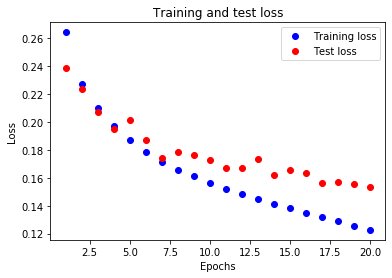

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

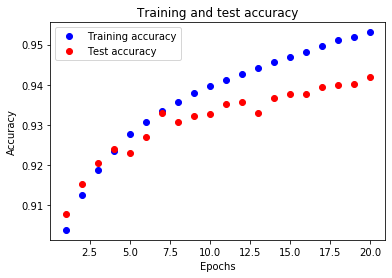

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Pretty Good Model

In [0]:
# set up the layers

model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# compile the model

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 35s 706us/step - loss: 0.3033 - acc: 0.8997 - val_loss: 0.2833 - val_acc: 0.9009
Epoch 2/20
50000/50000 [==============================] - 32s 638us/step - loss: 0.2800 - acc: 0.9011 - val_loss: 0.2529 - val_acc: 0.9036
Epoch 3/20
50000/50000 [==============================] - 31s 627us/step - loss: 0.2624 - acc: 0.9044 - val_loss: 0.2311 - val_acc: 0.9113
Epoch 4/20
50000/50000 [==============================] - 31s 625us/step - loss: 0.2482 - acc: 0.9084 - val_loss: 0.2193 - val_acc: 0.9155
Epoch 5/20
50000/50000 [==============================] - 32s 631us/step - loss: 0.2376 - acc: 0.9117 - val_loss: 0.2235 - val_acc: 0.9147
Epoch 6/20
50000/50000 [==============================] - 31s 625us/step - loss: 0.2283 - acc: 0.9147 - val_loss: 0.2105 - val_acc: 0.9193
Epoch 7/20
50000/50000 [==============================] - 31s 626us/step - loss: 0.2212 - acc: 0.9174 - val_loss: 0.

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 207us/step
Test accuracy: 0.9176399856567383


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

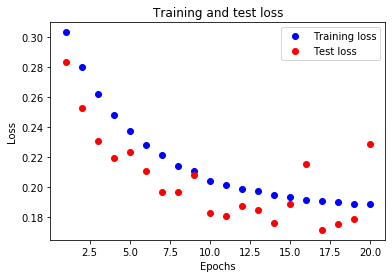

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

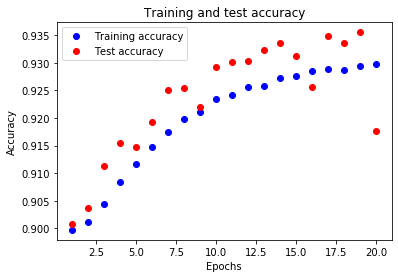

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()